<a href="https://colab.research.google.com/github/Bekmachev/test/blob/main/Homework12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

В работе использован датасет с сайта https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/

In [3]:
df = pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Центрирование численных данных**

In [7]:
# Так как база данных объемная, везьмем выборку из первых 20 строк
df1=df.loc[:20]
df1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,17.000000,21.000000,21.000000,21.000000,14.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,7.866272,201.395956,23782.038559,7.290387,338.489661,431.290832,14.443110,67.953515,3.781554,0.0
std,1.740394,41.718840,6581.889231,1.844694,43.612724,92.067108,3.062988,15.286084,0.778286,0.0
min,3.716080,118.988579,13672.091764,3.606036,268.646941,280.467916,8.399735,31.997993,2.436086,0.0
25%,7.119824,181.101509,18767.656682,6.546600,305.016263,364.098230,12.509164,56.651604,3.055934,0.0
50%,7.974522,205.344982,22305.567414,7.513408,331.216401,425.383419,13.789695,70.300213,4.075075,0.0
75%,8.975464,224.236259,28388.004887,8.110385,367.509253,477.974642,16.331693,76.509996,4.401425,0.0
max,11.180284,279.357167,41065.234765,10.333918,404.041635,592.885359,20.397022,100.341674,4.777382,0.0


In [8]:
mean = np.mean(df1, axis=0)
std = np.std(df1, axis=0)
centered_scaled_data = (df1 - mean) / std
centered_scaled_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.085832,-0.465607,0.005458,0.714476,1.480471,-1.359349,1.276166,-1.077534,NaN
1,-2.458019,-1.767796,-0.802081,-0.363919,NaN,1.798526,0.246524,-0.779238,0.946773,NaN
2,0.137910,0.561002,-0.602886,1.102909,NaN,-0.141178,0.811438,-0.102792,-0.955356,NaN
3,0.266812,0.318751,-0.274568,0.427136,0.437737,-0.757102,1.335961,2.171124,1.115449,NaN
4,0.726090,-0.498471,-0.903443,-0.413161,-0.674671,-0.365950,-0.965094,-2.410261,0.386451,NaN
5,-1.351661,-0.321335,0.773228,0.141360,-0.281046,-1.678640,-2.021757,-0.873839,-1.608689,NaN
6,1.396321,1.146447,0.773388,0.123885,1.312839,-1.643205,-0.218594,1.116127,-1.459543,NaN
7,0.455794,0.048278,-1.573957,-1.515011,-0.837093,0.482111,-0.695609,-0.345577,0.816125,NaN
8,NaN,-2.024084,-1.478446,0.285399,-1.661882,-0.466512,-0.581118,-0.940137,-0.245596,NaN
9,1.962778,0.634570,0.265047,0.992543,1.559786,1.475761,1.165774,0.269686,0.775490,NaN


**Вычислим расстояние между точками в датасете**

In [9]:
# Создадим набор точек из двух нужных нам колонок
aaa = {'col1': df1['ph'], 'col2': df1['Chloramines']}

Points= pd.DataFrame(data=aaa).to_numpy()

print (Points)

[[        nan  7.30021187]
 [ 3.71608008  6.63524588]
 [ 8.09912419  9.2758836 ]
 [ 8.31676588  8.05933238]
 [ 9.09222346  6.54659997]
 [ 5.58408664  7.54486879]
 [10.22386216  7.51340847]
 [ 8.63584872  4.56300869]
 [        nan  7.80417355]
 [11.18028447  9.07720002]
 [ 7.36064011  7.55070091]
 [ 7.97452165  8.1103845 ]
 [ 7.11982438  3.60603609]
 [        nan  6.83822347]
 [ 7.49623221  5.07255777]
 [ 6.34727176  9.62959628]
 [ 7.0517858  10.09479601]
 [ 9.18156001  6.90498973]
 [ 8.97546435  6.20432086]
 [ 7.3710503   4.43266929]
 [        nan 10.33391789]]


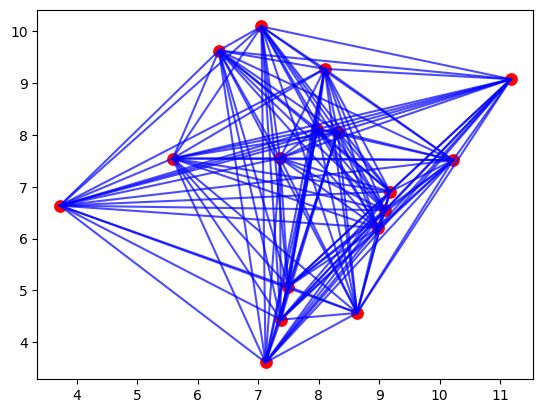

In [10]:
sns.scatterplot(x=Points[:, 0], y=Points[:, 1], color='red', s=100)
n = len(Points)
for i in range(n):
  for j in range(i + 1, n):
    x = [Points[i, 0], Points[j, 0]]
    y = [Points[i, 1], Points[j, 1]]
    plt.plot(x, y, 'b-', alpha=0.7)

<Axes: >

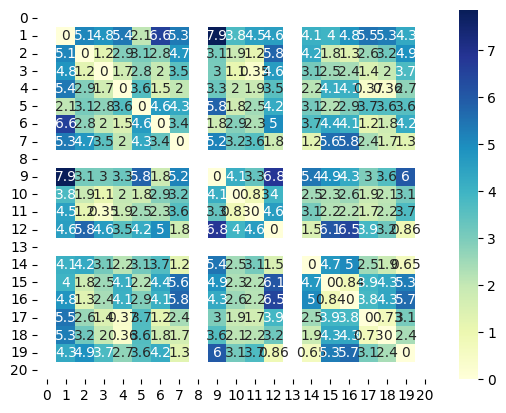

In [11]:
differences = Points[:, np.newaxis, :] - Points
squared_distances = np.sum(differences**2, axis=2)
distances = np.sqrt(squared_distances)
sns.heatmap(distances, annot=True, cmap="YlGnBu")

**Интерполяция пропущенных значений**

In [12]:
# Так как база данных объемная, везьмем выборку из 10 строк
df2=df.loc[25:35]

In [13]:
# Для дальнейшего построения графика сортируем значения столбца "ph" (т.к. он будет соответствовать оси Х) по возрастанию
df2.sort_values(by='ph', inplace=True)

<ipython-input-13-98424bab5134>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by='ph', inplace=True)


In [14]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,7.000000,11.000000,11.000000,11.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,7.132810,194.953368,21235.400391,7.400157,341.229141,411.636333,12.676692,57.228683,4.410493,0.0
std,2.458840,43.699449,6985.516543,1.239289,37.377330,68.690853,2.763347,16.655128,0.957031,0.0
min,3.445062,117.791230,13224.935639,5.474915,304.001993,298.990666,7.922598,30.284597,2.857472,0.0
25%,5.815116,169.454840,15194.821731,6.409127,307.707509,374.230915,10.657718,48.160101,3.946827,0.0
50%,7.181449,198.767351,19677.892466,7.700063,323.836384,412.986834,12.729525,52.676185,4.184397,0.0
75%,8.619819,220.953026,24344.928529,8.416221,384.007006,441.767127,14.352951,68.635716,5.073085,0.0
max,10.433291,266.421018,33424.768678,9.046833,395.389490,563.804743,16.899038,86.080727,6.038185,0.0


In [15]:
df2.interpolate(method='linear', axis=0, inplace=True)

<ipython-input-15-6da13b74ef4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.interpolate(method='linear', axis=0, inplace=True)


In [16]:
# Определить количество пропусков
df2.isnull().sum() * 100 / len(df)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

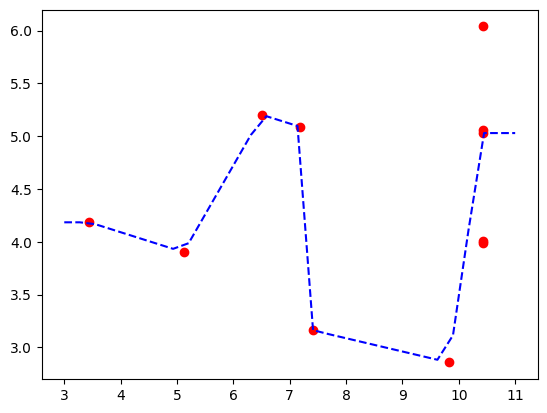

In [17]:
x = np.array(df2['ph'])
y = np.array(df2['Turbidity'])
x_new = np.linspace(3, 11, 30)
y_new = np.interp(x_new, x, y)
plt.scatter(x, y, label='Исходные точки', color='red')
plt.plot(x_new, y_new, label='Интерполяция', linestyle='--', color='blue')

**Обработка изображения**

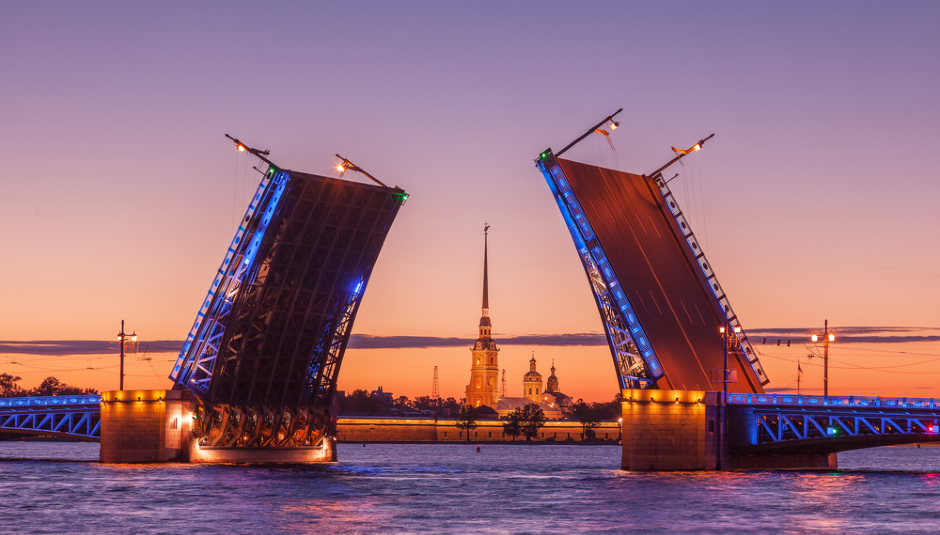

In [33]:
# Загружаем картинку
import cv2
from urllib.request import urlopen
import numpy as np
from google.colab.patches import cv2_imshow
response = urlopen("https://img.dmclk.ru/c960x640q80/blog/623c8e1ac2ef79002307d14c-%D0%BF%D0%B8%D1%82%D0%B5%D1%80%D1%80%D1%80%D1%80.webp")
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
cv2_imshow(image)

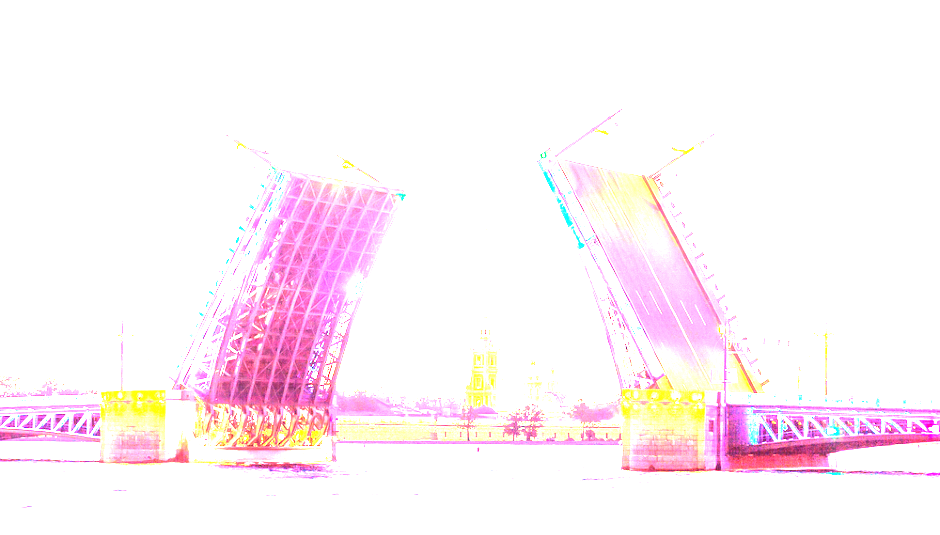

In [34]:
# Изменение яркости изображения
brightness_factor = 7.5
brightened_image = cv2.multiply(image, np.array([brightness_factor]))
brightened_image = np.clip(brightened_image, 0, 255).astype(np.uint8)
cv2_imshow(brightened_image)

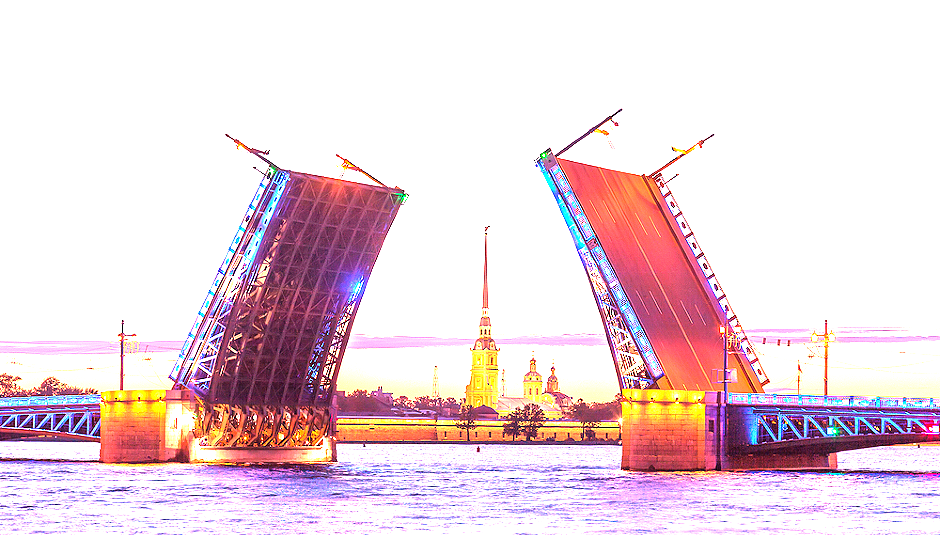

In [35]:
# Изменение контрастности изображения
filter = np.array([[0, -1, 0], [-1, 7, -1], [0, -1, 0]], dtype=np.float32)
result_image = cv2.filter2D(image, -1, filter )
cv2_imshow(result_image)